In [2]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib

In [3]:
results = pd.read_csv("../data/results.csv")

In [4]:
exp = results[results['Type'] == 'EXP']
sim = results[results['Type'] == 'SIM']
exp = exp.groupby(['Crystal Position', 'SNR', 'Noise Cluster Size']).mean()
sim = sim.groupby(['Crystal Position', 'SNR', 'Noise Cluster Size']).mean()
def latex_with_lines(df, *args, **kwargs):
    kwargs['column_format'] = '|'.join(['c'] * (df.index.nlevels + df.shape[1]))
    kwargs['multirow_align'] = 'c', 
    res = df.style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    {'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'},
    ], overwrite=False)
    res = res.to_latex(*args, **kwargs)
    return res.replace("\\\\\n", "\\\\ \\hline\n")
print(latex_with_lines(exp))
print(latex_with_lines(sim))

\begin{tabular}{c|c|c|c|c|c}
\hline
 &  &  & Loss & PSNR & SSIM \\ \hline
Crystal Position & SNR & Noise Cluster Size &  &  &  \\ \hline
\hline
\multirow[('c',)]{4}{*}{27} & -17 & 10 & 0.152054 & 14.255689 & 0.390771 \\ \hline
 & -15 & 10 & 0.142155 & 14.433208 & 0.429308 \\ \hline
 & -10 & 10 & 0.114933 & 15.082274 & 0.516019 \\ \hline
 & 0 & 0 & 0.035740 & 20.622516 & 0.859725 \\ \hline
\multirow[('c',)]{8}{*}{40} & \multirow[('c',)]{2}{*}{-17} & 5 & 0.078667 & 17.180819 & 0.674668 \\ \hline
 &  & 10 & 0.151625 & 14.470711 & 0.419404 \\ \hline
 & \multirow[('c',)]{2}{*}{-15} & 5 & 0.065755 & 18.158322 & 0.727976 \\ \hline
 &  & 10 & 0.118154 & 15.784523 & 0.521002 \\ \hline
 & \multirow[('c',)]{3}{*}{-10} & 5 & 0.063907 & 17.937821 & 0.741069 \\ \hline
 &  & 10 & 0.062487 & 17.804842 & 0.747376 \\ \hline
 &  & 20 & 0.167947 & 13.786124 & 0.361251 \\ \hline
 & 0 & 0 & 0.058402 & 18.303133 & 0.775911 \\ \hline
\hline
\end{tabular}

\begin{tabular}{c|c|c|c|c|c}
\hline
 &  &  & Loss & PS

In [5]:
from matplotlib.font_manager import findfont, FontProperties

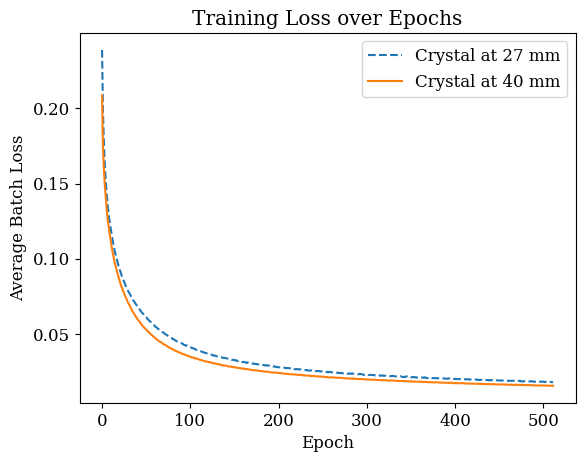

In [9]:
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
matplotlib.rcParams['font.size'] = 12

exp_27 = "../data/features/EXP_by_crystal/Crystal27mm/train_loss.pt"
exp_40 = "../data/features/EXP_by_crystal/Crystal40mm/train_loss.pt"
sim_27 = "../data/features/SIM_by_crystal/27mm/train_loss.pt"
sim_40 = "../data/features/SIM_by_crystal/0.8f/train_loss.pt"

exp_27 = torch.load(exp_27, map_location=torch.device('cpu'))
exp_40 = torch.load(exp_40, map_location=torch.device('cpu'))
sim_27 = torch.load(sim_27, map_location=torch.device('cpu'))
sim_40 = torch.load(sim_40, map_location=torch.device('cpu'))

exp_27 = list(map(torch.Tensor.item, exp_27))
exp_40 = list(map(torch.Tensor.item, exp_40))
sim_27 = list(map(torch.Tensor.item, sim_27))
sim_40 = list(map(torch.Tensor.item, sim_40))

plt.plot(exp_27, label = "Crystal at 27 mm", linestyle='dashed')
plt.plot(exp_40, label = "Crystal at 40 mm")
plt.title("Training Loss over Epochs")
plt.ylabel("Average Batch Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()
